In [2]:
from ast import increment_lineno
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os

In [3]:
from google.colab import drive
drive.mount("/content/drive")
drive.mount("/content/drive",
force_remount= True)

Mounted at /content/drive
Mounted at /content/drive


In [4]:
credit = pd.read_csv("/content/drive/MyDrive/credit_train(in).csv")

In [5]:
credit.head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0


EXPLORATORY DATA ANALYSIS *EDA* **bold text**

In [7]:
#CHECKING FOR THE COUNT OF DUPLICATE VALUE
credit.duplicated().sum()

np.int64(10215)

In [ ]:
#removing duplicate rows for the dataframe and also checking for the new dimension of the dataframe
credit.drop_duplicates(inplace= True)
credit.shape

(89785, 19)

In [8]:
#generate descriptive statistics of the dataframe
credit.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [9]:
#checking for null valesu
credit.isnull().sum()

,0
Loan ID,0
Customer ID,0
Loan Status,0
Current Loan Amount,0
Term,0
Credit Score,19154
Annual Income,19154
Years in current job,4222
Home Ownership,0
Purpose,0


In [10]:
#observation of the columns
credit.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [11]:
#summary of all the columns

def check (df):
  l=[]
  columns=df.columns
  for col in columns:
    dtypes = df[col].dtypes
    nunique = df[col].nunique()
    sum_null = df[col].isnull().sum()
    l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=["column", "dtypes", "nunique", "sum_null"]
    return df_check
check(credit).head(10)

,column,dtypes,nunique,sum_null
0,Loan ID,object,81999,0


In [12]:
#count of all unique values in the dataframe
credit.nunique()

,0
Loan ID,81999
Customer ID,81999
Loan Status,2
Current Loan Amount,22004
Term,2
Credit Score,324
Annual Income,36174
Years in current job,11
Home Ownership,4
Purpose,16


In [13]:
credit.head(2)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0


In [14]:
#dropping 2 columns "Loan ID" AND CUSTOMER ID  because they both value unique data
columns_to_drop = ["Loan ID", "Customer ID"]
existing_column = credit.columns.intersection(columns_to_drop)
credit.drop(existing_column, axis = 1, inplace= True)

In [15]:
credit.head(2)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0


In [18]:
credit["Purpose"].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'Take a Trip',
       'Other', 'small_business', 'Medical Bills', 'wedding', 'vacation',
       'Educational Expenses', 'moving', 'renewable_energy'], dtype=object)

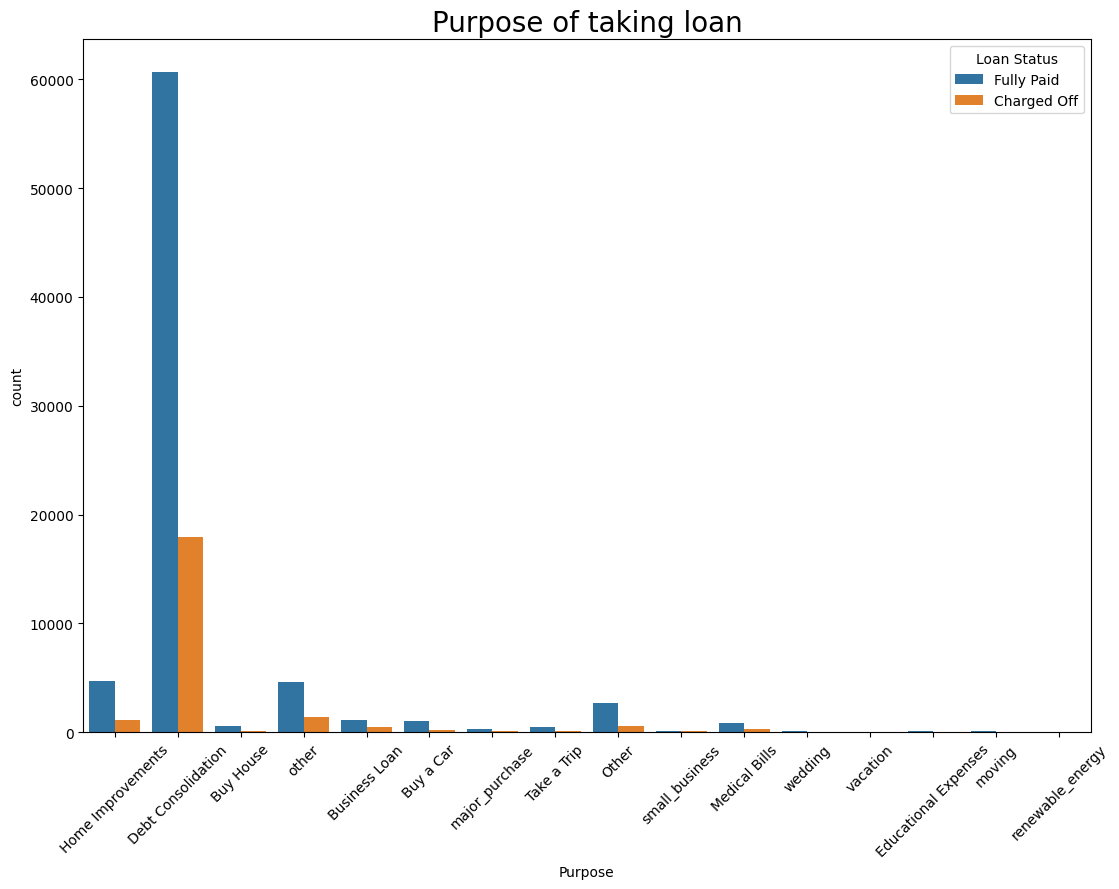

In [26]:
#The diagram below show the purpose of loan taking,majority of the loan was taken for Debt consolidation purpose
plt.figure(figsize=(13,9))
sns.countplot(x = "Purpose", data = credit, hue = "Loan Status")
plt.xticks(rotation = 45)
plt.title("Purpose of taking loan", fontdict={"fontsize":20})
plt.show()

<Axes: xlabel='Loan Status', ylabel='count'>

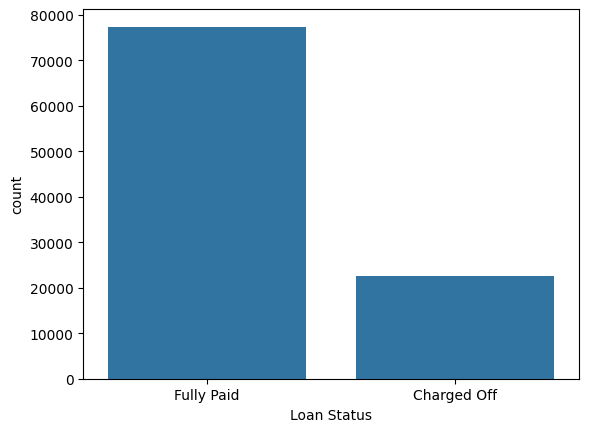

In [28]:
#what is the status of loans taken
sns.countplot(x= "Loan Status", data = credit)

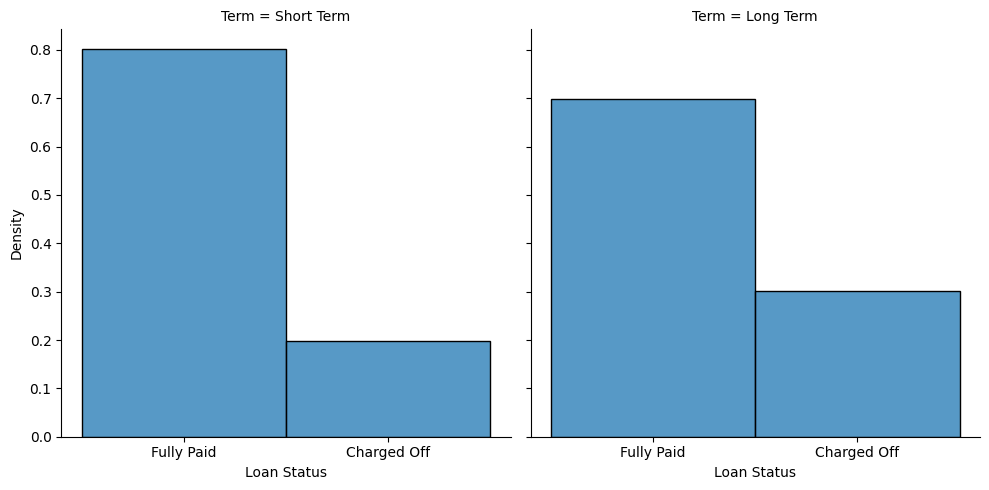

In [32]:
#comparsion between the loan status (Long and short term loans)
sns.displot(credit, x = "Loan Status", col= "Term", stat= "density", common_norm = False)

In [33]:
credit.head(2)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0


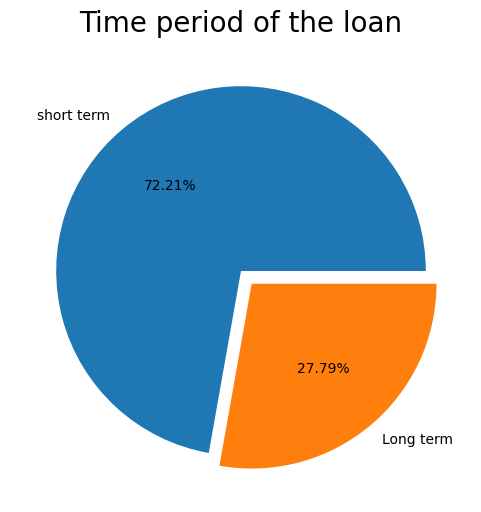

In [36]:
#what is the time of the loan taken?
plt.figure(figsize = (6,6))
plt.pie(x = credit["Term"].value_counts(),labels = ["short term", "Long term"], autopct="%.2f%%", explode = [0,0.09])
plt.title("Time period of the loan", fontdict = {"fontsize":20})
plt.show()

In [43]:
#Annual income by loan term
annual_income = credit.groupby("Term").agg({"Annual Income": "sum"})
annual_income

,Annual Income
Term,
Long Term,3.524992e+10
Short Term,7.617822e+10


In [48]:
credit["Annual Income"].describe()

,Annual Income
count,8.084600e+04
mean,1.378277e+06
std,1.081360e+06
min,7.662700e+04
25%,8.488440e+05
50%,1.174162e+06
75%,1.650663e+06
max,1.655574e+08
